## supporting libraries

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('chronickidneydisease.csv')
pd.set_option('display.max_columns', None)

df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [9]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
df.drop(columns=['id'],axis=1,inplace=True)

In [7]:
df.columns=['age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random','blood_urea','serum_creatinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class'] # manually giving the name  of the columns
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [8]:
cat_df=df.select_dtypes('object')
cat_df.head()

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
# Replacing null values in cat_df by mode
cat_df = cat_df.fillna(cat_df.mode().iloc[0])
cat_df.head()

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,normal,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,38,6000,5.2,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
cat_df.shape

(400, 14)

In [11]:
cat_df.isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [12]:
cat_df.head()

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,normal,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,38,6000,5.2,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [13]:
# Categorical feature analysis
for column in cat_df.columns:                                # value_counts Loop
    print("\n" + column)
    print(cat_df[column].value_counts())


red_blood_cells
normal      353
abnormal     47
Name: red_blood_cells, dtype: int64

pus_cell
normal      324
abnormal     76
Name: pus_cell, dtype: int64

pus_cell_clumps
notpresent    358
present        42
Name: pus_cell_clumps, dtype: int64

bacteria
notpresent    378
present        22
Name: bacteria, dtype: int64

packed_cell_volume
41      91
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
22       3
27       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
\t?      1
16       1
14       1
Name: packed_cell_volume, dtype: int64

white_blood_cell_count
9800     116
6700      10
9600       9
7200       9
9200       9
        ... 
19100      1
\t?        1
12300    

In [14]:
cat_df['class']=cat_df['class'].replace("ckd\t","ckd") #replace is used for renaming  
cat_df['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

In [15]:
cat_df['coronary_artery_disease']=cat_df['coronary_artery_disease'].replace("\tno","no") #replace is used for renaming  
cat_df['coronary_artery_disease'].value_counts()

no     366
yes     34
Name: coronary_artery_disease, dtype: int64

In [16]:
cat_df['diabetesmellitus']=cat_df['diabetesmellitus'].replace("\tno","no")
cat_df['diabetesmellitus']=cat_df['diabetesmellitus'].replace("\tyes","yes")
cat_df['diabetesmellitus']=cat_df['diabetesmellitus'].replace(" yes","yes")
cat_df['diabetesmellitus'].value_counts()

no     263
yes    137
Name: diabetesmellitus, dtype: int64

In [17]:
cat_df['red_blood_cell_count']=cat_df['red_blood_cell_count'].replace("\t?","5.2")
cat_df['red_blood_cell_count'].value_counts()

5.2    149
4.5     16
4.9     14
4.7     11
4.8     10
3.9     10
4.6      9
3.4      9
5.9      8
5.5      8
6.1      8
5.0      8
3.7      8
5.3      7
5.8      7
5.4      7
3.8      7
5.6      6
4.3      6
4.2      6
3.2      5
4.4      5
5.7      5
6.4      5
5.1      5
6.2      5
6.5      5
4.1      5
3.6      4
6.0      4
6.3      4
4.0      3
3.5      3
3.3      3
4        3
5        2
3.1      2
2.6      2
2.1      2
2.9      2
2.5      2
3.0      2
2.7      2
2.8      2
2.3      1
2.4      1
3        1
8.0      1
Name: red_blood_cell_count, dtype: int64

In [18]:
cat_df['white_blood_cell_count']=cat_df['white_blood_cell_count'].replace("\t?","9800")
cat_df['white_blood_cell_count'].value_counts()

9800     117
6700      10
9200       9
9600       9
7200       9
        ... 
11200      1
19100      1
12300      1
12700      1
16700      1
Name: white_blood_cell_count, Length: 91, dtype: int64

In [19]:
cat_df['packed_cell_volume']=cat_df['packed_cell_volume'].replace("\t?","41")
cat_df['packed_cell_volume']=cat_df['packed_cell_volume'].replace("\t43","41")
cat_df['packed_cell_volume'].value_counts()

41    93
52    21
44    19
48    19
40    16
43    14
45    13
42    13
33    12
50    12
32    12
36    12
28    12
37    11
34    11
35     9
29     9
46     9
30     9
31     8
24     7
39     7
26     6
38     5
51     4
53     4
49     4
47     4
54     4
25     3
22     3
27     3
19     2
23     2
15     1
21     1
20     1
17     1
9      1
18     1
16     1
14     1
Name: packed_cell_volume, dtype: int64

In [20]:
cat_df.head()

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,normal,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,38,6000,5.2,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [21]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   red_blood_cells          400 non-null    object
 1   pus_cell                 400 non-null    object
 2   pus_cell_clumps          400 non-null    object
 3   bacteria                 400 non-null    object
 4   packed_cell_volume       400 non-null    object
 5   white_blood_cell_count   400 non-null    object
 6   red_blood_cell_count     400 non-null    object
 7   hypertension             400 non-null    object
 8   diabetesmellitus         400 non-null    object
 9   coronary_artery_disease  400 non-null    object
 10  appetite                 400 non-null    object
 11  pedal_edema              400 non-null    object
 12  anemia                   400 non-null    object
 13  class                    400 non-null    object
dtypes: object(14)
memory usage: 43.9+ KB


In [22]:
cat_df.isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_df=cat_df.apply(le.fit_transform)
cat_df.head()

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,1,1,0,0,30,71,33,1,1,0,0,0,0,0
1,1,1,0,0,24,55,33,0,0,0,0,0,0,0
2,1,1,0,0,17,69,33,0,1,0,1,0,1,0
3,1,0,1,0,18,61,18,1,0,0,1,1,1,0
4,1,1,0,0,21,67,26,0,0,0,0,0,0,0


In [24]:
cat_df.dtypes

red_blood_cells            int32
pus_cell                   int32
pus_cell_clumps            int32
bacteria                   int32
packed_cell_volume         int32
white_blood_cell_count     int32
red_blood_cell_count       int32
hypertension               int32
diabetesmellitus           int32
coronary_artery_disease    int32
appetite                   int32
pedal_edema                int32
anemia                     int32
class                      int32
dtype: object

In [25]:
num_df=df.select_dtypes('float64','int64')
num_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


In [26]:
num_df.shape

(400, 11)

In [27]:
num_df.isnull().sum()

age                      9
blood_pressure          12
specific_gravity        47
albumin                 46
sugar                   49
blood glucose random    44
blood_urea              19
serum_creatinine        17
sodium                  87
potassium               88
hemoglobin              52
dtype: int64

In [28]:
num_df = num_df.fillna(num_df.median())
num_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6


In [29]:
num_df.isnull().sum()

age                     0
blood_pressure          0
specific_gravity        0
albumin                 0
sugar                   0
blood glucose random    0
blood_urea              0
serum_creatinine        0
sodium                  0
potassium               0
hemoglobin              0
dtype: int64

In [30]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   400 non-null    float64
 1   blood_pressure        400 non-null    float64
 2   specific_gravity      400 non-null    float64
 3   albumin               400 non-null    float64
 4   sugar                 400 non-null    float64
 5   blood glucose random  400 non-null    float64
 6   blood_urea            400 non-null    float64
 7   serum_creatinine      400 non-null    float64
 8   sodium                400 non-null    float64
 9   potassium             400 non-null    float64
 10  hemoglobin            400 non-null    float64
dtypes: float64(11)
memory usage: 34.5 KB


In [31]:
# Checking null values in categorical features

cat_df_col_null=cat_df.columns[cat_df.isnull().any()==True].tolist()
cat_df[cat_df_col_null].isnull().sum()

Series([], dtype: float64)

In [32]:
cat_df[cat_df_col_null].isnull().sum().count()

0

In [33]:
new_df=num_df.join(cat_df)
new_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,1,1,0,0,30,71,33,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,1,1,0,0,24,55,33,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,1,1,0,0,17,69,33,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,1,0,1,0,18,61,18,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,1,1,0,0,21,67,26,0,0,0,0,0,0,0


In [34]:
new_df.shape

(400, 25)

In [35]:
new_df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
blood glucose random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   blood glucose random     400 non-null    float64
 6   blood_urea               400 non-null    float64
 7   serum_creatinine         400 non-null    float64
 8   sodium                   400 non-null    float64
 9   potassium                400 non-null    float64
 10  hemoglobin               400 non-null    float64
 11  red_blood_cells          400 non-null    int32  
 12  pus_cell                 400 non-null    int32  
 13  pus_cell_clumps          400 non-null    int32  
 14  bacteria                 4

In [37]:
new_df.corr()

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
age,1.000000,0.136316,-0.160374,0.085918,0.186750,0.230731,0.194291,0.133985,-0.086040,0.049399,-0.178308,-0.014904,-0.102286,0.157401,0.042427,-0.210438,0.025130,-0.210298,0.395073,0.364306,0.231419,0.156581,0.094772,0.052938,-0.227842
blood_pressure,0.136316,1.000000,-0.166980,0.123518,0.189561,0.150180,0.180841,0.143184,-0.100705,0.063667,-0.279303,-0.150384,-0.156231,0.056808,0.110164,-0.275566,-0.011706,-0.216960,0.266901,0.226489,0.084135,0.175054,0.056902,0.195134,-0.293693
specific_gravity,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,-0.299413,-0.244995,-0.171998,0.210791,-0.052935,0.490699,0.253894,0.365353,-0.306426,-0.231704,0.477625,0.021376,0.371423,-0.323643,-0.351016,-0.135814,-0.230975,-0.253803,-0.184155,0.659504
albumin,0.085918,0.123518,-0.479962,1.000000,0.287751,0.293150,0.347418,0.161310,-0.225612,0.107893,-0.474399,-0.394844,-0.561713,0.417868,0.377935,-0.442864,-0.055604,-0.380193,0.406057,0.308101,0.200957,0.303145,0.411080,0.229556,-0.531562
sugar,0.186750,0.189561,-0.292053,0.287751,1.000000,0.627002,0.126897,0.096434,-0.051758,0.177396,-0.156807,-0.092940,-0.190062,0.168091,0.119399,-0.174481,0.018012,-0.147821,0.254268,0.430514,0.229301,0.069216,0.116442,0.042464,-0.294555
blood glucose random,0.230731,0.150180,-0.299413,0.293150,0.627002,1.000000,0.118859,0.068886,-0.130569,0.052732,-0.254435,-0.138615,-0.247665,0.195223,0.079162,-0.252950,0.019267,-0.194584,0.367816,0.503254,0.207020,0.177285,0.094806,0.112449,-0.379321
blood_urea,0.194291,0.180841,-0.244995,0.347418,0.126897,0.118859,1.000000,0.581517,-0.308806,0.339771,-0.541635,-0.233935,-0.344501,0.189094,0.161676,-0.452542,-0.041132,-0.454808,0.395601,0.315958,0.224782,0.274123,0.338740,0.436321,-0.369393
serum_creatinine,0.133985,0.143184,-0.171998,0.161310,0.096434,0.068886,0.581517,1.000000,-0.624036,0.204751,-0.342492,-0.135660,-0.158038,0.054429,0.053959,-0.312116,-0.001915,-0.302741,0.282864,0.209763,0.195968,0.162131,0.176685,0.236528,-0.291245
sodium,-0.086040,-0.100705,0.210791,-0.225612,-0.051758,-0.130569,-0.308806,-0.624036,1.000000,0.069612,0.331483,0.139037,0.171171,-0.138816,-0.082156,0.324424,0.042187,0.297254,-0.306953,-0.264693,-0.221274,-0.158112,-0.150379,-0.198643,0.334900
potassium,0.049399,0.063667,-0.052935,0.107893,0.177396,0.052732,0.339771,0.204751,0.069612,1.000000,-0.096428,0.020473,-0.155434,-0.011416,-0.001944,-0.106480,-0.001791,-0.111493,0.055840,0.057615,0.007551,-0.019855,0.061354,0.100791,-0.065218


<AxesSubplot:>

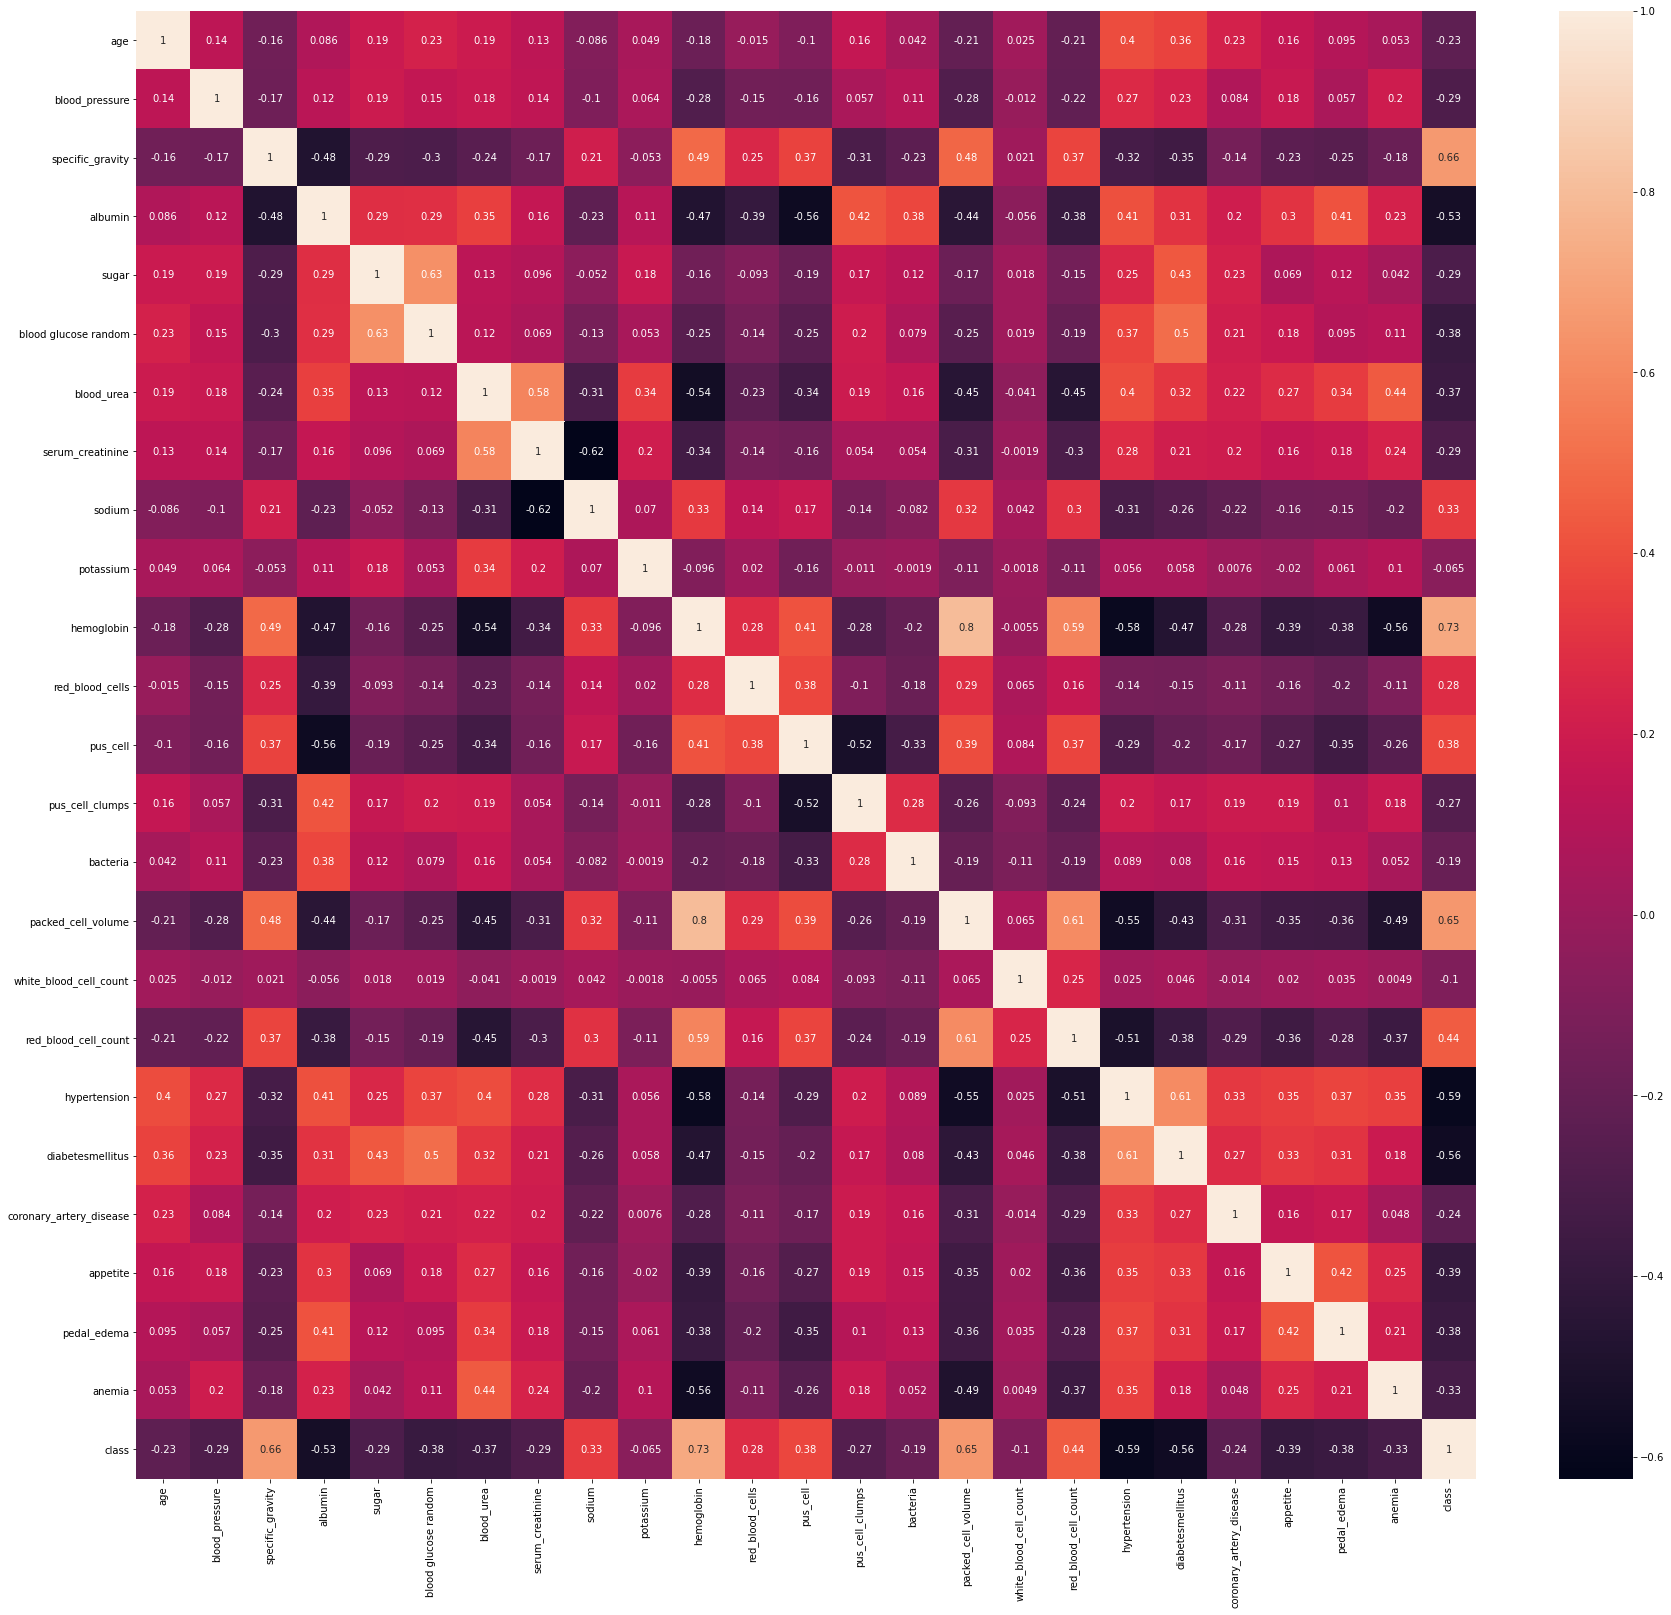

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,27))

sns.heatmap(new_df.corr(),annot=True)

In [39]:
new_df.corr()['class'].sort_values(ascending=False)

class                      1.000000
hemoglobin                 0.726368
specific_gravity           0.659504
packed_cell_volume         0.654468
red_blood_cell_count       0.443355
pus_cell                   0.375154
sodium                     0.334900
red_blood_cells            0.282642
potassium                 -0.065218
white_blood_cell_count    -0.101292
bacteria                  -0.186871
age                       -0.227842
coronary_artery_disease   -0.236088
pus_cell_clumps           -0.265313
serum_creatinine          -0.291245
blood_pressure            -0.293693
sugar                     -0.294555
anemia                    -0.325396
blood_urea                -0.369393
pedal_edema               -0.375154
blood glucose random      -0.379321
appetite                  -0.393341
albumin                   -0.531562
diabetesmellitus          -0.559060
hypertension              -0.590438
Name: class, dtype: float64

## independent variables

In [40]:
X1=new_df.drop(['class'],axis=1)
X1.head()

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,1,1,0,0,30,71,33,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,1,1,0,0,24,55,33,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,1,1,0,0,17,69,33,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,1,0,1,0,18,61,18,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,1,1,0,0,21,67,26,0,0,0,0,0,0


In [41]:
X1.shape

(400, 24)

In [42]:
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame (scale(X1), columns=X1.columns)
X_scaled.head()

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia
0,-0.210031,0.254214,0.421486,0.076249,-0.380269,-0.320122,-0.419451,-0.319668,0.040104,-0.062903,1.053226,0.36489,0.484322,-0.342518,-0.241249,0.573320,0.286668,0.421086,1.311903,1.385535,-0.304789,-0.507801,-0.484322,-0.420084
1,-2.627234,-1.972476,0.421486,2.363728,-0.380269,-0.320122,-0.784315,-0.390819,0.040104,-0.062903,-0.457965,0.36489,0.484322,-0.342518,-0.241249,-0.169643,-0.296138,0.421086,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084
2,0.615355,0.254214,-1.421074,0.838742,2.507853,3.697618,-0.074858,-0.212942,0.040104,-0.062903,-1.084556,0.36489,0.484322,-0.342518,-0.241249,-1.036433,0.213817,0.421086,-0.762252,1.385535,-0.304789,1.969276,-0.484322,2.380476
3,-0.210031,-0.488016,-2.342354,2.363728,-0.380269,-0.373337,-0.014047,0.142813,-2.896333,-0.737181,-0.494823,0.36489,-2.064742,2.919556,-0.241249,-0.912606,-0.077586,-1.176964,1.311903,-0.721743,-0.304789,1.969276,2.064742,2.380476
4,-0.033163,0.254214,-1.421074,0.838742,-0.380269,-0.519679,-0.622154,-0.284093,0.040104,-0.062903,-0.347390,0.36489,0.484322,-0.342518,-0.241249,-0.541125,0.140966,-0.324671,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084


In [43]:
from sklearn.decomposition import PCA
pca=PCA()
X_pca=pd.DataFrame(pca.fit_transform(X_scaled))

In [44]:
pca.explained_variance_ratio_

array([0.28283046, 0.07726344, 0.07363784, 0.05389566, 0.0511765 ,
       0.04699408, 0.04357934, 0.03961281, 0.03814091, 0.03354182,
       0.03295047, 0.0311341 , 0.02709224, 0.02452772, 0.02148744,
       0.01865206, 0.01727928, 0.01705354, 0.0147077 , 0.0141567 ,
       0.01218672, 0.01159563, 0.00922543, 0.00727811])

<BarContainer object of 24 artists>

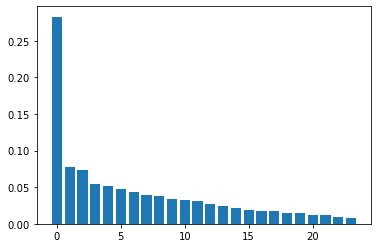

In [45]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(np.arange(24),pca.explained_variance_ratio_)

In [46]:
pca.explained_variance_ratio_[:10].sum()

0.7406728605018926

In [47]:
pca.explained_variance_ratio_.sum()

1.0

In [48]:
X=new_df.loc[:,['age','bacteria','white_blood_cell_count','potassium','red_blood_cells',
               'sodium','pus_cell','red_blood_cell_count','packed_cell_volume','specific_gravity','hemoglobin']]
X.head()

,age,bacteria,white_blood_cell_count,potassium,red_blood_cells,sodium,pus_cell,red_blood_cell_count,packed_cell_volume,specific_gravity,hemoglobin
0,48.0,0,71,4.4,1,138.0,1,33,30,1.020,15.4
1,7.0,0,55,4.4,1,138.0,1,33,24,1.020,11.3
2,62.0,0,69,4.4,1,138.0,1,33,17,1.010,9.6
3,48.0,0,61,2.5,1,111.0,0,18,18,1.005,11.2
4,51.0,0,67,4.4,1,138.0,1,26,21,1.010,11.6


In [49]:
from sklearn.preprocessing import scale
scaled_X=pd.DataFrame (scale(X), columns=X.columns)
scaled_X.head()

,age,bacteria,white_blood_cell_count,potassium,red_blood_cells,sodium,pus_cell,red_blood_cell_count,packed_cell_volume,specific_gravity,hemoglobin
0,-0.210031,-0.241249,0.286668,-0.062903,0.36489,0.040104,0.484322,0.421086,0.573320,0.421486,1.053226
1,-2.627234,-0.241249,-0.296138,-0.062903,0.36489,0.040104,0.484322,0.421086,-0.169643,0.421486,-0.457965
2,0.615355,-0.241249,0.213817,-0.062903,0.36489,0.040104,0.484322,0.421086,-1.036433,-1.421074,-1.084556
3,-0.210031,-0.241249,-0.077586,-0.737181,0.36489,-2.896333,-2.064742,-1.176964,-0.912606,-2.342354,-0.494823
4,-0.033163,-0.241249,0.140966,-0.062903,0.36489,0.040104,0.484322,-0.324671,-0.541125,-1.421074,-0.347390


In [50]:
scaled_X.shape

(400, 11)

In [53]:
new_df.loc[new_df['class']==0, 'class'] = 'disease'
new_df.loc[new_df['class']==1, 'class'] = 'no_disease'

In [51]:
y=new_df['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

In [52]:
y.value_counts()

0    250
1    150
Name: class, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y,test_size=0.2,random_state=42)

In [54]:
X_train.shape

(320, 11)

In [55]:
X_test.shape

(80, 11)

In [77]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(X_train,y_train)
y_predict1=model1.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
rfc=accuracy_score(y_test,y_predict1)
rfc

0.9875

In [78]:
pd.crosstab(y_test,y_predict1)

col_0,0,1
class,,
0,51,1
1,0,28


In [79]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [59]:
print('Train accuracy score of RFC:',model1.score(X_train, y_train))
print('Test accuracy score of RFC:',model1.score(X_test, y_test))

Train accuracy score of RFC: 1.0
Test accuracy score of RFC: 0.9875


In [60]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X_train,y_train)
y_predict2=model2.predict(X_test)
lg=accuracy_score(y_test,y_predict2)
lg

0.9625

In [61]:
pd.crosstab(y_test,y_predict2)

col_0,0,1
class,,
0,51,1
1,2,26


In [75]:
51/52

0.9807692307692307

In [76]:
26/28

0.9285714285714286

In [62]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.96      0.93      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [63]:
print('Train accuracy score of LOG_RE:',model2.score(X_train, y_train))
print('Test accuracy score of LOG_RE:',model2.score(X_test, y_test))

Train accuracy score of LOG_RE: 0.978125
Test accuracy score of LOG_RE: 0.9625


In [71]:
probability = model1.predict_proba(X_test)[:, 1]

In [72]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

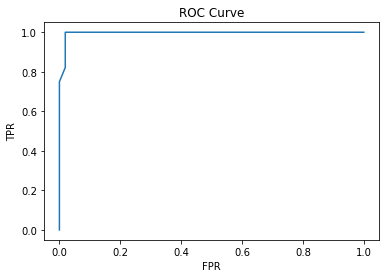

In [73]:
fpr,tpr,thresholds = roc_curve(y_test,probability)


plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [74]:
roc_auc_score(y_test,probability)

0.9958791208791209

In [85]:
import pickle
pickle.dump(model1, open('ckd1.pkl','wb'))

In [84]:
pwd

'C:\\Users\\Saumya\\Downloads\\Chronic-Kidney-Disease-main'